> **Installing split folder**

In [1]:
!pip install split-folders

> **Importing Libraries**

In [3]:
import splitfolders
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

> **Splitting Data**

In [4]:
input_folder = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'#input data path

#split with a ratio
#to only split into training and validation set,set a tuple to "ratio",i.e,train, val, test
splitfolders.ratio(input_folder, output= '/kaggle/working/',
                  seed =42 ,ratio = (.7, .2, .1),
                  group_prefix = None)

Copying files: 75000 files [17:56, 69.65 files/s] 


> **Importing Files**

In [5]:
train = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/working/train',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (256, 256))

test = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/working/test',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    shuffle = False,
    image_size = (256, 256))

val = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/working/val',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (256, 256))

Found 52500 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.


> **Data Augmentation**

In [6]:
data_augmentation = keras.Sequential(
[
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
])

In [7]:
inputs = keras.Input(shape = (256,256))
x = data_augmentation(inputs)

In [8]:
train = train.map(
    lambda img, label:(data_augmentation(img),label),
    num_parallel_calls = tf.data.AUTOTUNE,
)

> **Setting Checkpoint For Epochs**

In [9]:
#set checkpoint
file_path = '/kaggle/working/'
cnn_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(file_path,
                                                          save_weights_only = False,
                                                          monitor = 'val_accuracy',
                                                          mode = 'max',
                                                          verbose = 1,
                                                          save_freq = 'epoch',
                                                          save_best_only = False)

> **Building Architecture**

In [10]:
Cnn = tf.keras.models.Sequential()

**CNN1**

In [11]:
Cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))
Cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))

**Pool1**

In [12]:
Cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

**CNN2**

In [13]:
Cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))
Cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))

**Pool2**

In [14]:
Cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

**CNN3**

In [15]:
Cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))
Cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))
Cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))


**Pool3**

In [16]:
Cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

**Cnn**

In [17]:
Cnn.add(tf.keras.layers.Conv2D(filters = 512, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))
Cnn.add(tf.keras.layers.Conv2D(filters = 512, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))
Cnn.add(tf.keras.layers.Conv2D(filters = 512, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))

**Pool4**

In [18]:
Cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

**CNN5**

In [19]:
Cnn.add(tf.keras.layers.Conv2D(filters = 512, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))
Cnn.add(tf.keras.layers.Conv2D(filters = 512, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))
Cnn.add(tf.keras.layers.Conv2D(filters = 512, kernel_size =3,padding = 'same',activation = 'relu',input_shape = [256,256,3]))

**Pool5**

In [20]:
Cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

**Flatten**

In [21]:
Cnn.add(tf.keras.layers.Flatten())

**Fully Connected 1**

In [22]:
Cnn.add(tf.keras.layers.Dense(units = 4096,activation = 'relu'))

**Fully Connected 2**

In [23]:
Cnn.add(tf.keras.layers.Dense(units = 4096,activation = 'relu'))

**Output Layer**

In [24]:
Cnn.add(tf.keras.layers.Dense(units = 5,activation = 'softmax'))

**Compile**

In [25]:
Cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

> **Fitting The Model**

In [26]:
Cnn.fit(x = train, epochs=10 , validation_data = val)

Epoch 1/10
1641/1641 [==============================] - 573s 336ms/step - loss: 0.7525 - accuracy: 0.9050 - val_loss: 0.0453 - val_accuracy: 0.9603
Epoch 2/10
1641/1641 [==============================] - 564s 343ms/step - loss: 0.0547 - accuracy: 0.9527 - val_loss: 0.0913 - val_accuracy: 0.9290
Epoch 3/10
1641/1641 [==============================] - 555s 338ms/step - loss: 0.0433 - accuracy: 0.9630 - val_loss: 0.0854 - val_accuracy: 0.9259
Epoch 4/10
1641/1641 [==============================] - 547s 333ms/step - loss: 0.0434 - accuracy: 0.9633 - val_loss: 0.0375 - val_accuracy: 0.9684
Epoch 5/10
1641/1641 [==============================] - 552s 336ms/step - loss: 0.0362 - accuracy: 0.9690 - val_loss: 0.0526 - val_accuracy: 0.9528
Epoch 6/10
1641/1641 [==============================] - 541s 330ms/step - loss: 0.0337 - accuracy: 0.9724 - val_loss: 0.0240 - val_accuracy: 0.9811
Epoch 7/10
1641/1641 [==============================] - 544s 331ms/step - loss: 0.0289 - accuracy: 0.9762 - val_

> **Evaluation**

In [27]:
true_label = np.concatenate([y for x,y in test], axis = 0) #it defines each true label of images in order to use it
                                                           #in confusion matrix (true_labels,predicted_labels)
true_labels = np.argmax(true_label, axis =1)               #np.argmax : Returns the indices of max value in axis
                                                           #[0,0,0,1,0] => 3
    
predictions = Cnn.predict(x = test,verbose = 0)

In [28]:
predicted_labels = np.argmax(predictions, axis = 1)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Arborio'),
  Text(0, 1.5, 'Basmati'),
  Text(0, 2.5, 'Ipsala'),
  Text(0, 3.5, 'Jasmine'),
  Text(0, 4.5, 'Karacadag')])

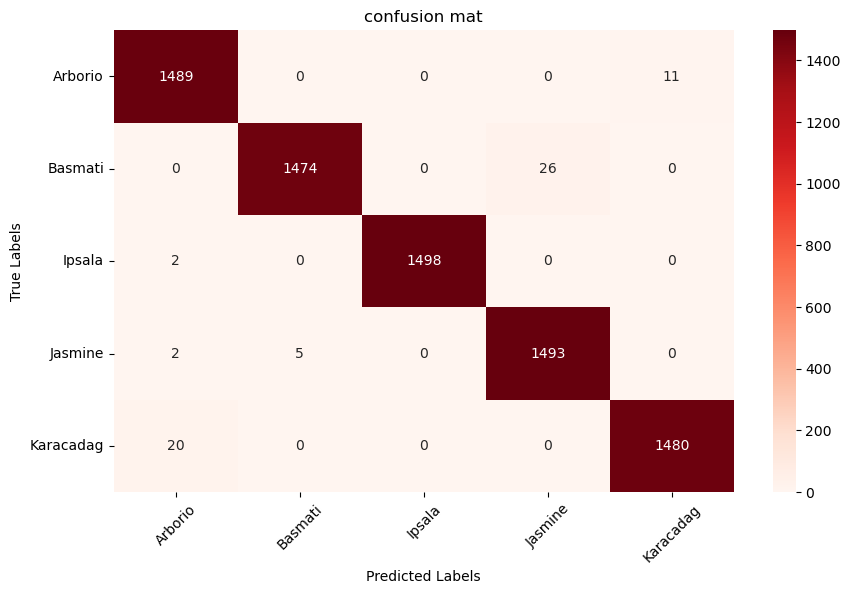

In [29]:
confusion_mat = confusion_matrix(true_labels,predicted_labels)
fig, ax =plt.subplots(figsize= (10,6))
class_labels = ['Arborio','Basmati','Ipsala','Jasmine','Karacadag']
sns.heatmap(confusion_mat, annot = True,fmt = 'd',cmap = 'Reds',
           xticklabels= class_labels, yticklabels = class_labels)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('confusion mat')
plt.xticks(rotation= 45)
plt.yticks(rotation = 0)

**More Epochs if Needed**

my model was ok doing 10 epochs but if you want to add more you can use checkpoints

In [30]:
#it will start from epoch no.10
#Cnn.fit(x = train, validation_data = val,epochs = 20, callbacks=[CNN_checkpoint_callback],initial_epoch = 10)

> **Saving Weights**

In [31]:
tf.keras.Cnn.save_wights('/kaggle/working/')

AttributeError: module 'keras.api._v2.keras' has no attribute 'Cnn'